In [25]:
!pip install ydata_profiling

In [26]:
# Import neccessary model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [27]:
# Get the csv file into dataframe
df = pd.read_csv("/content/GiaChungCu_HCM_June2021_laydulieu_com.csv")
print(df.shape)
df.describe()
df.head(20)

(1950, 11)


,GIỐNG - LOẠI,GIỐNG - NHU CẦU,GIỐNG - TỈNH THÀNH,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ TẦNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
3,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN
4,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ
5,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 7,3200.0,70.0,NaN,NaN,2.0,NaN,Đang chờ sổ
6,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 2,3800.0,56.6,NaN,NaN,2.0,2.0,NaN
7,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận 11,1570.0,20.0,Đông Bắc,NaN,1.0,1.0,Đã có sổ
8,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Quận Thủ Đức,3500.0,89.0,NaN,NaN,2.0,2.0,NaN
9,"Căn hộ, chung cư",Cần bán,Hồ Chí Minh,Huyện Bình Chánh,1500.0,55.0,Nam,NaN,2.0,2.0,Giấy tờ khác


In [28]:
# Dropping all the columns that is not neccessary and duplicates
df = df.drop(['GIỐNG - LOẠI', 'GIỐNG - NHU CẦU', 'GIỐNG - TỈNH THÀNH'], axis = 1)
df = df.drop_duplicates()

In [29]:
df.head(10)

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,HƯỚNG,SỐ TẦNG,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,Quận 9,2650.0,69.0,NaN,NaN,2.0,2.0,Đã có sổ
1,Quận Tân Bình,3970.0,74.1,NaN,NaN,2.0,2.0,Đang chờ sổ
2,Quận 9,678.0,46.5,Tây,NaN,1.0,1.0,Đang chờ sổ
3,Quận Tân Phú,2870.0,65.0,NaN,NaN,2.0,2.0,NaN
4,Quận 9,3000.0,70.0,Đông Bắc,NaN,2.0,2.0,Đã có sổ
5,Quận 7,3200.0,70.0,NaN,NaN,2.0,NaN,Đang chờ sổ
6,Quận 2,3800.0,56.6,NaN,NaN,2.0,2.0,NaN
7,Quận 11,1570.0,20.0,Đông Bắc,NaN,1.0,1.0,Đã có sổ
8,Quận Thủ Đức,3500.0,89.0,NaN,NaN,2.0,2.0,NaN
9,Huyện Bình Chánh,1500.0,55.0,Nam,NaN,2.0,2.0,Giấy tờ khác


<Axes: >

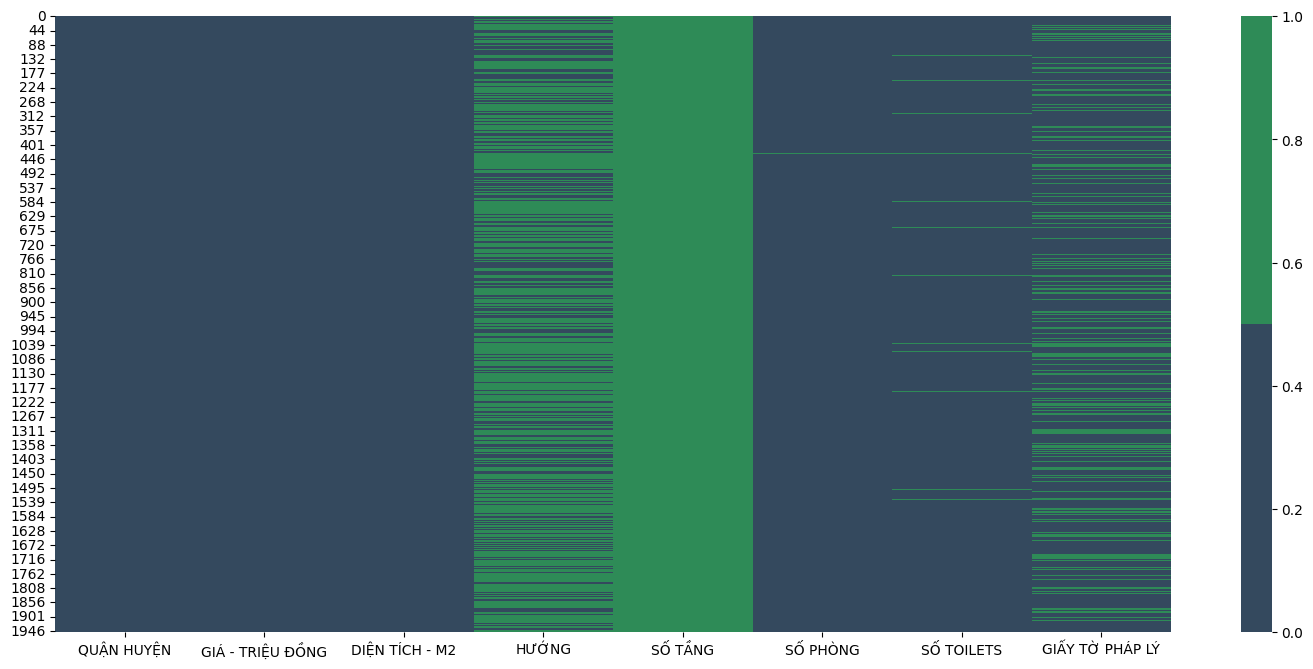

In [30]:
# Visualizgin missing data to select the correct way to fill in missing data
plt.figure(figsize=(18,8))

colours = ['#34495E', 'seagreen']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

In [31]:
# Calculating the percentage of missing value in each column
df.isnull().mean() * 100


,0
QUẬN HUYỆN,0.000000
GIÁ - TRIỆU ĐỒNG,0.000000
DIỆN TÍCH - M2,0.105485
HƯỚNG,65.664557
SỐ TẦNG,100.000000
SỐ PHÒNG,0.263713
SỐ TOILETS,2.848101
GIẤY TỜ PHÁP LÝ,24.472574


In [32]:
'''
As we can see:
The column of floors index does not have any value so we will need to drop it.
The percentage of missing value is too high for imputation to have any effect withou noie and bias
Therefore we will need to drop both column and impute data into the others.
'''
df = df.drop(['HƯỚNG', 'SỐ TẦNG'], axis = 1)
df.head(20)

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,Quận 9,2650.0,69.0,2.0,2.0,Đã có sổ
1,Quận Tân Bình,3970.0,74.1,2.0,2.0,Đang chờ sổ
2,Quận 9,678.0,46.5,1.0,1.0,Đang chờ sổ
3,Quận Tân Phú,2870.0,65.0,2.0,2.0,NaN
4,Quận 9,3000.0,70.0,2.0,2.0,Đã có sổ
5,Quận 7,3200.0,70.0,2.0,NaN,Đang chờ sổ
6,Quận 2,3800.0,56.6,2.0,2.0,NaN
7,Quận 11,1570.0,20.0,1.0,1.0,Đã có sổ
8,Quận Thủ Đức,3500.0,89.0,2.0,2.0,NaN
9,Huyện Bình Chánh,1500.0,55.0,2.0,2.0,Giấy tờ khác


In [33]:
'''
Because of of the value is missing not at random. We decide to use mode imputation for the categorical value
and mean imputation for the numerical value.
'''
df['SỐ TOILETS'] = df['SỐ TOILETS'].fillna(df['SỐ TOILETS'].mean())
df['SỐ PHÒNG'] = df['SỐ PHÒNG'].fillna(df['SỐ PHÒNG'].mean())
df['DIỆN TÍCH - M2'] = df['DIỆN TÍCH - M2'].fillna(df['DIỆN TÍCH - M2'].mean())

df['QUẬN HUYỆN'] = df['QUẬN HUYỆN'].fillna(df['QUẬN HUYỆN'].mode()[0])
df['GIẤY TỜ PHÁP LÝ'] = df['GIẤY TỜ PHÁP LÝ'].fillna(df['GIẤY TỜ PHÁP LÝ'].mode()[0])


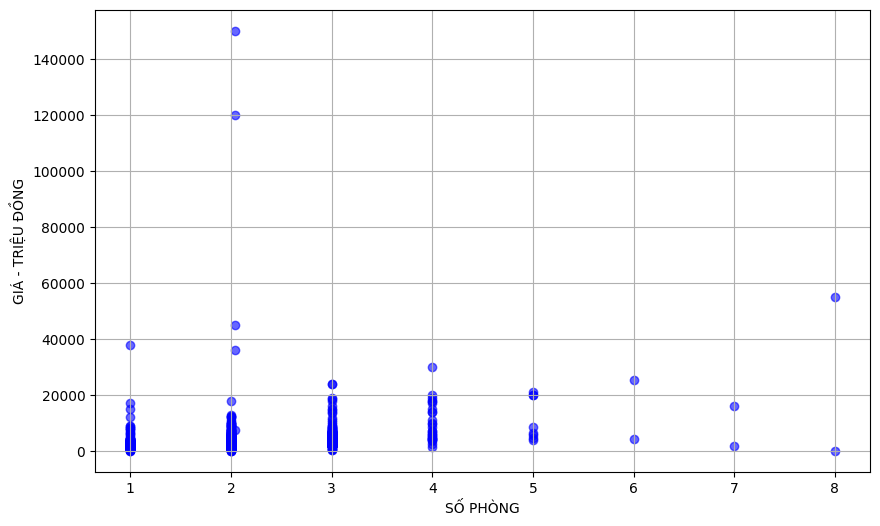

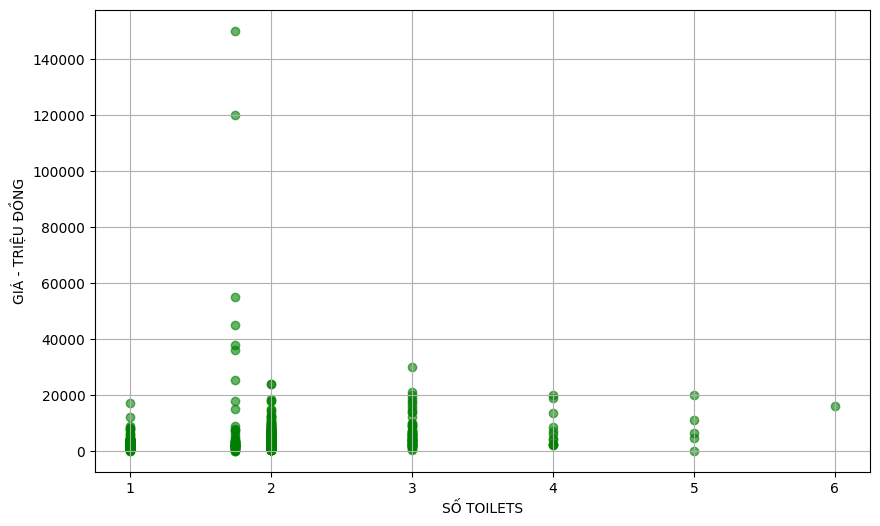

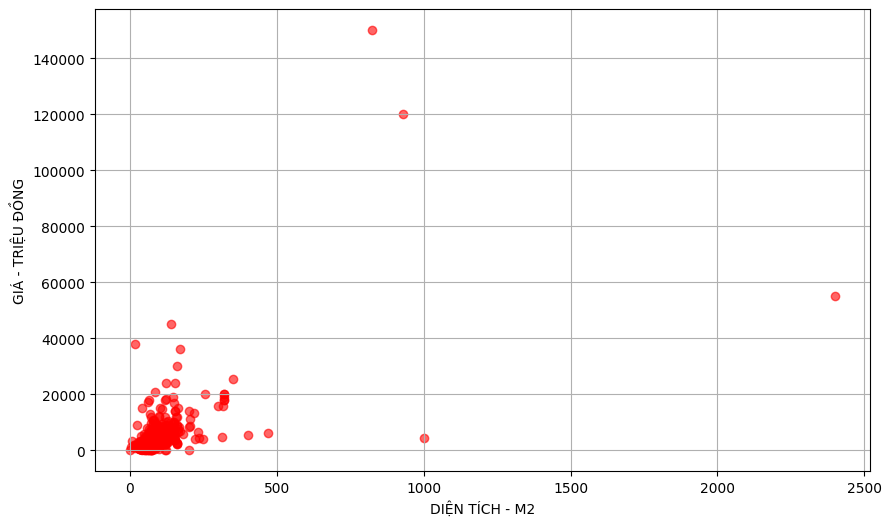

In [34]:
# Visualize data
# Scatter plot for 'SỐ PHÒNG' vs 'GIÁ - TRIỆU ĐỒNG'
# Adjust figure size for more space

# Scatter plot for 'SỐ PHÒNG' vs 'GIÁ - TRIỆU ĐỒNG' with alpha (transparency) and grid
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['SỐ PHÒNG'], df['GIÁ - TRIỆU ĐỒNG'], alpha=0.6, color='blue')
ax.set_xlabel('SỐ PHÒNG')
ax.set_ylabel('GIÁ - TRIỆU ĐỒNG')
ax.grid(True)  # Add gridlines for better visualization
plt.show()

# Scatter plot for 'SỐ TOILETS' vs 'GIÁ - TRIỆU ĐỒNG' with alpha and adjusted size
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['SỐ TOILETS'], df['GIÁ - TRIỆU ĐỒNG'], alpha=0.6, color='green')
ax.set_xlabel('SỐ TOILETS')
ax.set_ylabel('GIÁ - TRIỆU ĐỒNG')
ax.grid(True)
plt.show()

# Scatter plot for 'DIỆN TÍCH - M2' vs 'GIÁ - TRIỆU ĐỒNG' with alpha and figure size
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['DIỆN TÍCH - M2'], df['GIÁ - TRIỆU ĐỒNG'], alpha=0.6, color='red')
ax.set_xlabel('DIỆN TÍCH - M2')
ax.set_ylabel('GIÁ - TRIỆU ĐỒNG')
ax.grid(True)
plt.show()


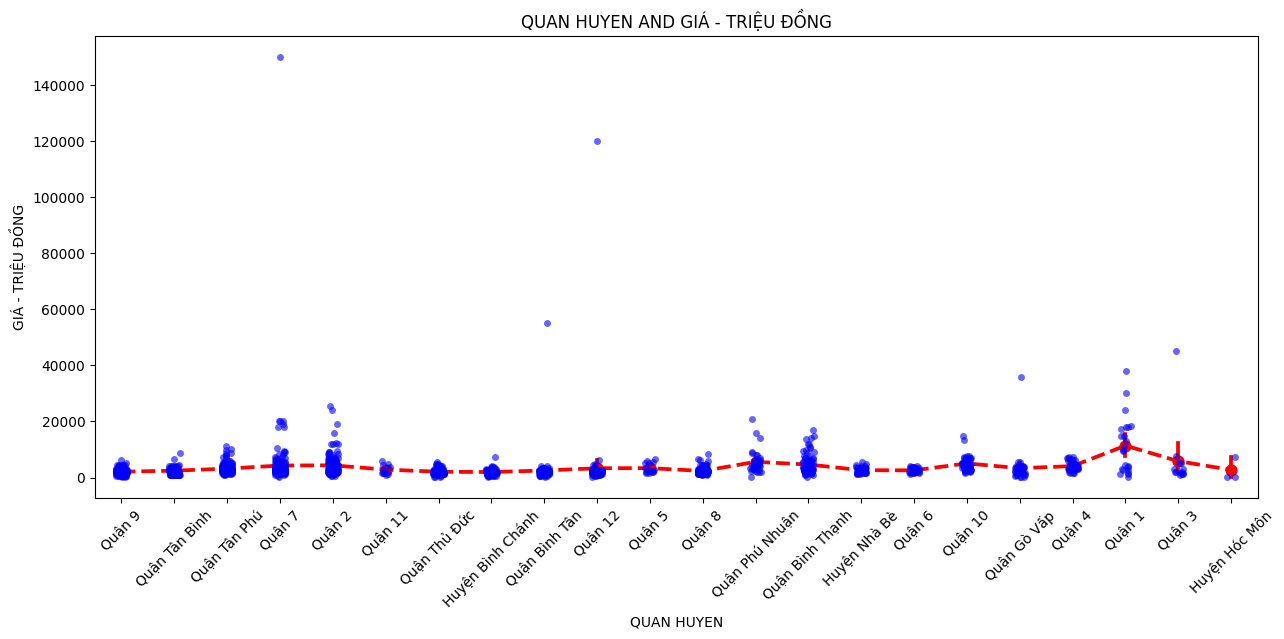

In [35]:
# Visualizing for Quan huyen and Gia TIEN
plt.figure(figsize=(15, 6))
sns.stripplot(x='QUẬN HUYỆN', y='GIÁ - TRIỆU ĐỒNG', data=df, jitter=True, color='blue', alpha=0.6)
sns.pointplot(x='QUẬN HUYỆN', y='GIÁ - TRIỆU ĐỒNG', data=df, estimator='mean', color='red', markers='o', linestyles='dashed')
plt.title('QUAN HUYEN AND GIÁ - TRIỆU ĐỒNG')
plt.xlabel('QUAN HUYEN')
plt.ylabel('GIÁ - TRIỆU ĐỒNG')
plt.xticks(rotation=45)  # Rotate x-axis labels if categories are long
plt.show()

In [36]:
df

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,Quận 9,2650.0,69.0,2.0,2.0,Đã có sổ
1,Quận Tân Bình,3970.0,74.1,2.0,2.0,Đang chờ sổ
2,Quận 9,678.0,46.5,1.0,1.0,Đang chờ sổ
3,Quận Tân Phú,2870.0,65.0,2.0,2.0,Đang chờ sổ
4,Quận 9,3000.0,70.0,2.0,2.0,Đã có sổ
...,...,...,...,...,...,...
1945,Quận 7,1500.0,73.0,2.0,2.0,Đã có sổ
1946,Quận 7,1550.0,73.0,2.0,2.0,Đang chờ sổ
1947,Quận Tân Phú,2900.0,65.2,2.0,2.0,Đang chờ sổ
1948,Quận 7,1720.0,85.0,2.0,3.0,Đang chờ sổ


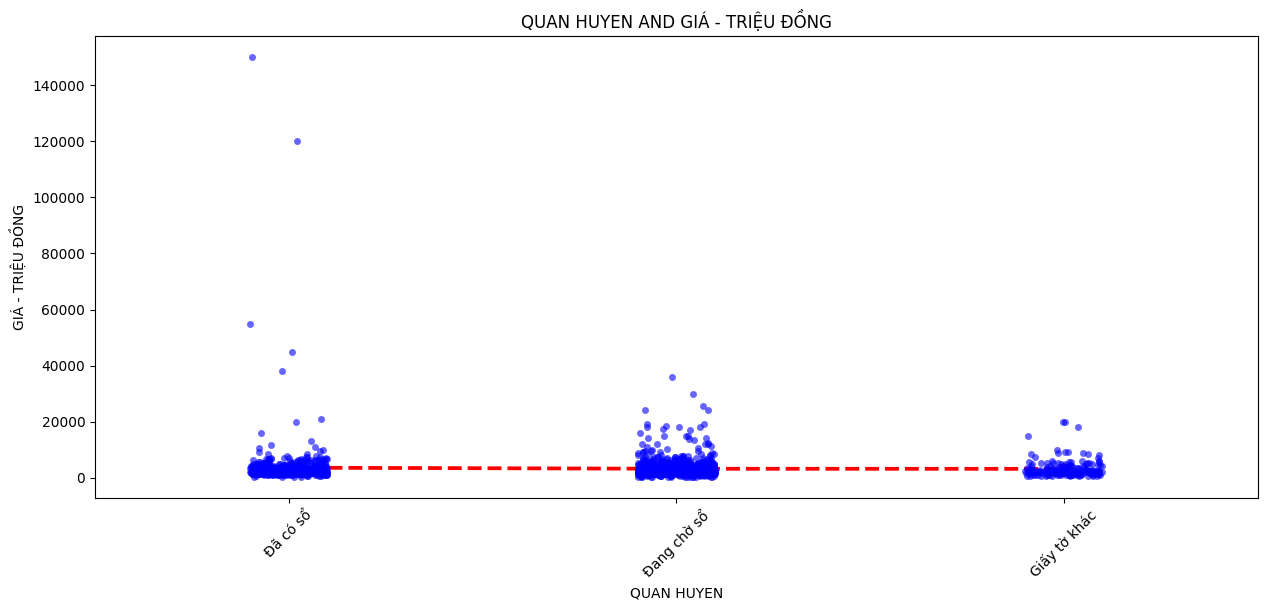

In [37]:
# Visualize for GIA TIEN AND GIAY TO
plt.figure(figsize=(15, 6))
sns.stripplot(x='GIẤY TỜ PHÁP LÝ', y='GIÁ - TRIỆU ĐỒNG', data=df, jitter=True, color='blue', alpha=0.6)
sns.pointplot(x='GIẤY TỜ PHÁP LÝ', y='GIÁ - TRIỆU ĐỒNG', data=df, estimator='mean', color='red', markers='o', linestyles='dashed')
plt.title('QUAN HUYEN AND GIÁ - TRIỆU ĐỒNG')
plt.xlabel('QUAN HUYEN')
plt.ylabel('GIÁ - TRIỆU ĐỒNG')
plt.xticks(rotation=45)  # Rotate x-axis labels if categories are long
plt.show()

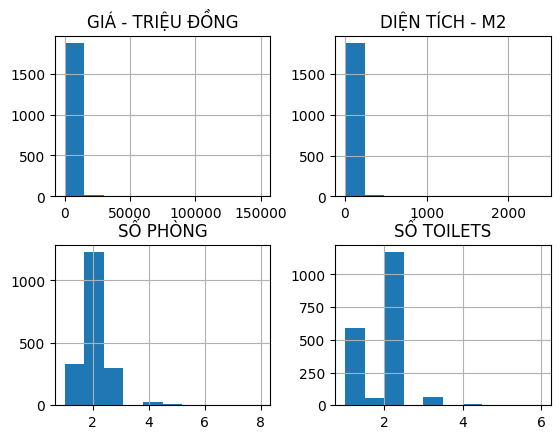

<Figure size 1000x600 with 0 Axes>

In [38]:
df_new = df.drop(['QUẬN HUYỆN'], axis = 1)
df_new.hist()
plt.figure(figsize=(10, 6))
plt.show()

In [39]:
df.head(20)

,QUẬN HUYỆN,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ
0,Quận 9,2650.0,69.0,2.0,2.000000,Đã có sổ
1,Quận Tân Bình,3970.0,74.1,2.0,2.000000,Đang chờ sổ
2,Quận 9,678.0,46.5,1.0,1.000000,Đang chờ sổ
3,Quận Tân Phú,2870.0,65.0,2.0,2.000000,Đang chờ sổ
4,Quận 9,3000.0,70.0,2.0,2.000000,Đã có sổ
5,Quận 7,3200.0,70.0,2.0,1.739957,Đang chờ sổ
6,Quận 2,3800.0,56.6,2.0,2.000000,Đang chờ sổ
7,Quận 11,1570.0,20.0,1.0,1.000000,Đã có sổ
8,Quận Thủ Đức,3500.0,89.0,2.0,2.000000,Đang chờ sổ
9,Huyện Bình Chánh,1500.0,55.0,2.0,2.000000,Giấy tờ khác


In [40]:

# Final evaluation of the dataset to select proper imputation method
profile = ProfileReport(df, title = 'Housing_Price', explorative = True)
profile.to_file('Housing_Price.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
# Normalize the data
scaler = StandardScaler()
df[['DIỆN TÍCH - M2', 'SỐ PHÒNG', 'SỐ TOILETS']] = scaler.fit_transform(df[['DIỆN TÍCH - M2', 'SỐ PHÒNG', 'SỐ TOILETS']])

In [42]:
# Encode data

df_encoded = pd.get_dummies(df, columns=['GIẤY TỜ PHÁP LÝ', 'QUẬN HUYỆN'])

# Check the result
df_encoded.head(10)


,GIÁ - TRIỆU ĐỒNG,DIỆN TÍCH - M2,SỐ PHÒNG,SỐ TOILETS,GIẤY TỜ PHÁP LÝ_Giấy tờ khác,GIẤY TỜ PHÁP LÝ_Đang chờ sổ,GIẤY TỜ PHÁP LÝ_Đã có sổ,QUẬN HUYỆN_Huyện Bình Chánh,QUẬN HUYỆN_Huyện Hóc Môn,QUẬN HUYỆN_Huyện Nhà Bè,...,QUẬN HUYỆN_Quận 7,QUẬN HUYỆN_Quận 8,QUẬN HUYỆN_Quận 9,QUẬN HUYỆN_Quận Bình Thạnh,QUẬN HUYỆN_Quận Bình Tân,QUẬN HUYỆN_Quận Gò Vấp,QUẬN HUYỆN_Quận Phú Nhuận,QUẬN HUYỆN_Quận Thủ Đức,QUẬN HUYỆN_Quận Tân Bình,QUẬN HUYỆN_Quận Tân Phú
0,2650.0,-0.091779,-0.056395,4.481313e-01,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,3970.0,-0.020402,-0.056395,4.481313e-01,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,678.0,-0.406678,-1.459591,-1.275163e+00,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2870.0,-0.147761,-0.056395,4.481313e-01,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3000.0,-0.077783,-0.056395,4.481313e-01,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
5,3200.0,-0.077783,-0.056395,3.826482e-16,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,3800.0,-0.265323,-0.056395,4.481313e-01,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,1570.0,-0.777560,-1.459591,-1.275163e+00,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,3500.0,0.188131,-0.056395,4.481313e-01,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
9,1500.0,-0.287716,-0.056395,4.481313e-01,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
# Function to rename the column names

import unicodedata

def apply_function(arr, func):
    # Use enumerate to get both index and element
    return [(index, func(value)) for index, value in enumerate(arr)]

BANG_XOA_DAU = str.maketrans(
    "ÁÀẢÃẠĂẮẰẲẴẶÂẤẦẨẪẬĐÈÉẺẼẸÊẾỀỂỄỆÍÌỈĨỊÓÒỎÕỌÔỐỒỔỖỘƠỚỜỞỠỢÚÙỦŨỤƯỨỪỬỮỰÝỲỶỸỴáàảãạăắằẳẵặâấầẩẫậđèéẻẽẹêếềểễệíìỉĩịóòỏõọôốồổỗộơớờởỡợúùủũụưứừửữựýỳỷỹỵ",
    "A"*17 + "D" + "E"*11 + "I"*5 + "O"*17 + "U"*11 + "Y"*5 + "a"*17 + "d" + "e"*11 + "i"*5 + "o"*17 + "u"*11 + "y"*5
)

def normalize(txt: str) -> str:
    if not unicodedata.is_normalized("NFC", txt):
        txt = unicodedata.normalize("NFC", txt)
    return txt.translate(BANG_XOA_DAU)

In [44]:
# Rename the column names into non Unicode to avoid font error
renamed_columns = apply_function(df_encoded.columns, normalize)
print(renamed_columns)
df_encoded.columns = [col[1] for col in renamed_columns]


df_encoded.rename(columns={})

[(0, 'GIA - TRIEU DONG'), (1, 'DIEN TICH - M2'), (2, 'SO PHONG'), (3, 'SO TOILETS'), (4, 'GIAY TO PHAP LY_Giay to khac'), (5, 'GIAY TO PHAP LY_Dang cho so'), (6, 'GIAY TO PHAP LY_Da co so'), (7, 'QUAN HUYEN_Huyen Binh Chanh'), (8, 'QUAN HUYEN_Huyen Hoc Mon'), (9, 'QUAN HUYEN_Huyen Nha Be'), (10, 'QUAN HUYEN_Quan 1'), (11, 'QUAN HUYEN_Quan 10'), (12, 'QUAN HUYEN_Quan 11'), (13, 'QUAN HUYEN_Quan 12'), (14, 'QUAN HUYEN_Quan 2'), (15, 'QUAN HUYEN_Quan 3'), (16, 'QUAN HUYEN_Quan 4'), (17, 'QUAN HUYEN_Quan 5'), (18, 'QUAN HUYEN_Quan 6'), (19, 'QUAN HUYEN_Quan 7'), (20, 'QUAN HUYEN_Quan 8'), (21, 'QUAN HUYEN_Quan 9'), (22, 'QUAN HUYEN_Quan Binh Thanh'), (23, 'QUAN HUYEN_Quan Binh Tan'), (24, 'QUAN HUYEN_Quan Go Vap'), (25, 'QUAN HUYEN_Quan Phu Nhuan'), (26, 'QUAN HUYEN_Quan Thu Duc'), (27, 'QUAN HUYEN_Quan Tan Binh'), (28, 'QUAN HUYEN_Quan Tan Phu')]


,GIA - TRIEU DONG,DIEN TICH - M2,SO PHONG,SO TOILETS,GIAY TO PHAP LY_Giay to khac,GIAY TO PHAP LY_Dang cho so,GIAY TO PHAP LY_Da co so,QUAN HUYEN_Huyen Binh Chanh,QUAN HUYEN_Huyen Hoc Mon,QUAN HUYEN_Huyen Nha Be,...,QUAN HUYEN_Quan 7,QUAN HUYEN_Quan 8,QUAN HUYEN_Quan 9,QUAN HUYEN_Quan Binh Thanh,QUAN HUYEN_Quan Binh Tan,QUAN HUYEN_Quan Go Vap,QUAN HUYEN_Quan Phu Nhuan,QUAN HUYEN_Quan Thu Duc,QUAN HUYEN_Quan Tan Binh,QUAN HUYEN_Quan Tan Phu
0,2650.0,-0.091779,-0.056395,0.448131,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,3970.0,-0.020402,-0.056395,0.448131,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,678.0,-0.406678,-1.459591,-1.275163,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2870.0,-0.147761,-0.056395,0.448131,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3000.0,-0.077783,-0.056395,0.448131,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,1500.0,-0.035797,-0.056395,0.448131,False,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1946,1550.0,-0.035797,-0.056395,0.448131,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1947,2900.0,-0.144962,-0.056395,0.448131,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1948,1720.0,0.132149,-0.056395,2.171425,False,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [45]:
# Ouput the data-1
df_encoded.to_csv('Housing_Price_encoded.csv', index=False)